## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
Combiled_Data_df=pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")
# Display the data table for preview
Combiled_Data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
Number_of_Mice=Combiled_Data_df["Sex"].value_counts()
Number_of_Mice

Male      958
Female    935
Name: Sex, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_Mice=Combiled_Data_df.loc[Combiled_Data_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
Duplicate_Mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

#Combiled_Data_df

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Data_Drop_Id=Combiled_Data_df[Combiled_Data_df["Mouse ID"].isin(Duplicate_Mice)==False]
Clean_Data_Drop_Id=Clean_Data_Drop_Id.sort_values(["Tumor Volume (mm3)"], ascending=True)
Clean_Data_Drop_Id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


In [8]:
# Checking the number of mice in the clean DataFrame.
Number_of_Mice_Clean=Clean_Data_Drop_Id["Sex"].value_counts()
Number_of_Mice_Clean

Male      958
Female    922
Name: Sex, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
#Staright forward way
Eash_Regimen_df=Clean_Data_Drop_Id.groupby("Drug Regimen")                                      
Each_Regimen_Statistics=Eash_Regimen_df.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
Each_Regimen_Statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
means=Clean_Data_Drop_Id.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians=Clean_Data_Drop_Id.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variances=Clean_Data_Drop_Id.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
Standard_Deviations=Clean_Data_Drop_Id.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems=Clean_Data_Drop_Id.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

Each_Regimen_Statistics_New=pd.DataFrame({
    "Mean":means,
    "Median":medians,
    "Variance":variances,
    "Standard Deviation":Standard_Deviations,
    "SEM":sems
})
Each_Regimen_Statistics_New




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
#Number of mice regimen wise
Number_of_Mice_Regimen=Clean_Data_Drop_Id.groupby(["Drug Regimen"]).count()["Mouse ID"]
Number_of_Mice_Regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

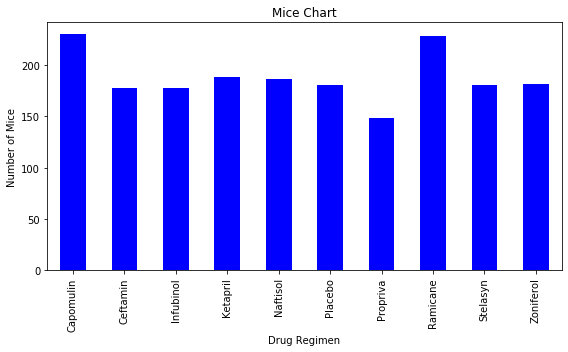

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Pymaceuticals_bar=Number_of_Mice_Regimen.plot(kind="bar",color="b", figsize=(8,5), title="Mice Chart")
Pymaceuticals_bar.set_xlabel("Drug Regimen")
Pymaceuticals_bar.set_ylabel("Number of Mice")
plt.tight_layout()
plt.show()
Save_Image=plt.savefig("images/bar_plot_pandas.png")

Text(0, 0.5, 'Number of Mice')

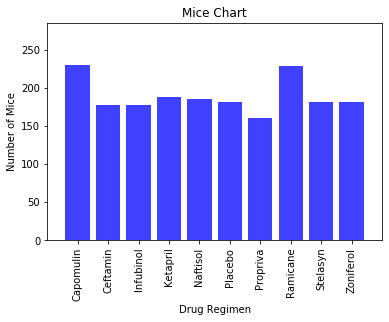

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis 
x_axis = np.arange(len(Number_of_Mice_Regimen))

plt.bar(x_axis, mice, color="b", alpha=0.75, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],  rotation="vertical")

plt.xlim(-1, 10)
plt.ylim(0, 285)

plt.title("Mice Chart")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
Save_Image=plt.savefig("images/bar_plot_pyplot.png")

In [24]:
#Find unique number of Mice using groupby
Gender_of_Mice=Combiled_Data_df.groupby(["Mouse ID","Sex"])
#Create two dateFrame for two component
Gender_of_Mice_df=pd.DataFrame(Gender_of_Mice.size())
Gender_of_Mice_df1=pd.DataFrame(Gender_of_Mice_df.groupby(["Sex"]).count())
Gender_of_Mice_df1.columns=["Total Mice"]
#Find percentage of Mice accordingto sex

Gender_of_Mice_df1["Percentage of Sex"]=(100*Gender_of_Mice_df1["Total Mice"]/Gender_of_Mice_df1["Total Mice"].sum())
Gender_of_Mice_df1["Percentage of Sex"]=Gender_of_Mice_df1["Percentage of Sex"]

Gender_of_Mice_df1


,Total Mice,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


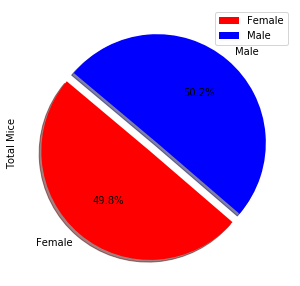

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#declare color
colors=["Red","Blue"]
explode=(0.1,0)
Pymaceuticals_pie=Gender_of_Mice_df1.plot(kind="pie" ,y="Total Mice",  
                  colors=colors, figsize=(5,5),startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
Save_Image=plt.savefig("images/pie_plot_pandas.png")

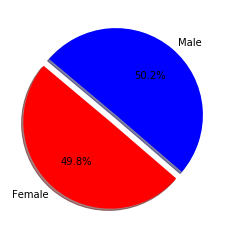

<Figure size 432x288 with 0 Axes>

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Percentage=[49.799197, 50.200803]
labels=["Female","Male"]
colors=["Red","Blue"]
explode=(0.1,0)
plt.pie(Percentage, labels=labels, colors=colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.show()
Save_Image=plt.savefig("images/pie_plot_pyplot.png")

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Best_Regimen=Clean_Data_Drop_Id[Clean_Data_Drop_Id["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
Best_Regimen=Best_Regimen.sort_values(["Timepoint"], ascending=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Best_Regimen_df=pd.merge(Combiled_Data_df,Best_Regimen, how ="outer")

Best_Regimen_df=Best_Regimen_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#get the tumor volume at the last timepoint
Best_Regimen_Last=Best_Regimen_df.groupby(["Drug Regimen", "Mouse ID"]).last()
Best_Regimen_Last.head()


Timepoint  Tumor Volume (mm3)
Drug Regimen Mouse ID                               
Capomulin    b128             45           38.982878
             b742             45           38.939633
             f966             20           30.485985
             g288             45           37.074024
             g316             45           40.159220

In [30]:
# Put treatments into a list for for loop (and later for plot labels)
#find quartiles
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Best_Regimen_Last["Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Create empty list to fill with tumor vol data (for plotting)
print(f"The lower quartile of Drug for Mice is: {lowerq}")
print(f"The upper quartile of Drug for Mice is: {upperq}")
print(f"The interquartile range of Drug for Mice is: {iqr}")
print(f"The the median of Drug for Mice is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


# Locate the rows which contain mice on each drug and get the tumor volumes 
 # Determine outliers using upper and lower bounds
Outliers_df=Best_Regimen_Last.loc[(Best_Regimen_Last["Tumor Volume (mm3)"]>upper_bound) |(Best_Regimen_Last["Tumor Volume (mm3)"] < lower_bound), :]
Outliers_df   
  
    # add subset     
#Result : No outlier found
    

The lower quartile of Drug for Mice is: 45.93471217
The upper quartile of Drug for Mice is: 64.95756185
The interquartile range of Drug for Mice is: 19.022849680000007
The the median of Drug for Mice is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


,,Timepoint,Tumor Volume (mm3)
Drug Regimen,Mouse ID,,


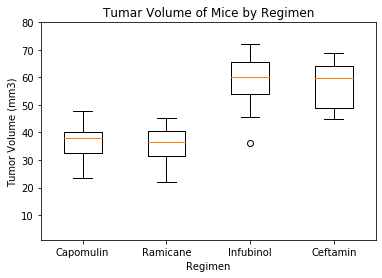

<Figure size 432x288 with 0 Axes>

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Best_Regimen_Last=Best_Regimen_df.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
Best_Regimen_df=Best_Regimen_Last.to_frame()
Best_Regimen_df

Top_4_Regimen=["Capomulin","Ramicane","Infubinol","Ceftamin"]
Final_df=Best_Regimen_df.reset_index()
Tumar_Lists=Final_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
Tumar_Lists_df=pd.DataFrame(Tumar_Lists)
Tumar_Lists_df=Tumar_Lists_df.reindex(Top_4_Regimen)

Tumar_Volums=[vol for vol in Tumar_Lists_df["Tumor Volume (mm3)"]]

plt.boxplot(Tumar_Volums, labels=Top_4_Regimen)
plt.title("Tumar Volume of Mice by Regimen")
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(1, 80)
plt.show()
Save_Image=plt.savefig("images/box_plot.png")

## Line and Scatter Plots

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# select a Mouse ID from Capomulin Regimen("b128")

TimeP_vs_TumarV = Combiled_Data_df[Combiled_Data_df["Mouse ID"]=="b128"]
TimeP_vs_TumarV

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


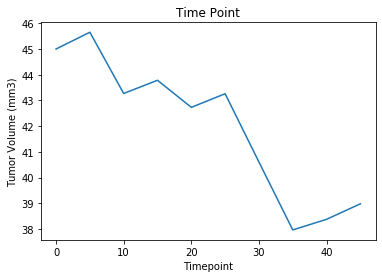

<Figure size 432x288 with 0 Axes>

In [35]:
TimeP_vs_TumarV_df=TimeP_vs_TumarV[["Mouse ID", "Timepoint", "Tumor Volume (mm3)","Weight (g)"]]
TimeP_vs_TumarV_df.head()
Line_plot_df=TimeP_vs_TumarV_df.reset_index()
Line_plot_df
Line_plot_df_Index=Line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#Generate a Line Plot

plt.plot(TimeP_vs_TumarV['Timepoint'],TimeP_vs_TumarV["Tumor Volume (mm3)"])
plt.xlabel('Timepoint')
plt.ylabel("Tumor Volume (mm3)")
plt.title("Time Point")
plt.show()
Save_Image=plt.savefig("images/line_plot.png")

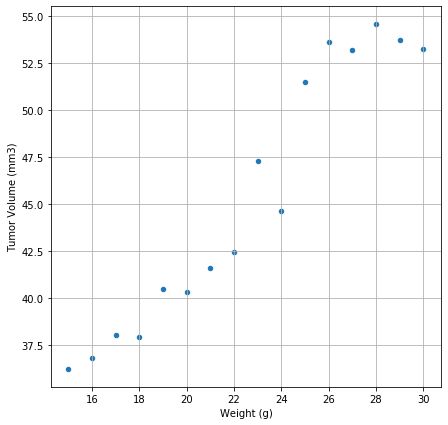

<Figure size 432x288 with 0 Axes>

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
MouseW_vs_TumarVAV=Combiled_Data_df[Combiled_Data_df["Drug Regimen"].isin(["Capomulin"])]
MouseW_vs_TumarVAV_df=Combiled_Data_df[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
MouseW_vs_TumarVAV_Sort=MouseW_vs_TumarVAV_df.sort_values(["Weight (g)"], ascending=True)
MouseW_vs_TumarVAV_Sort_Index=MouseW_vs_TumarVAV_Sort.reset_index()
MouseW_vs_TumarVAV_Sort_Index

Average_Capomul_Ave=MouseW_vs_TumarVAV_Sort_Index.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
Capomulin_Reg=pd.DataFrame(Average_Capomul_Ave).reset_index()
#Generate Scatter
Capomulin_Scatter=Capomulin_Reg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid = True, figsize= (7,7))
plt.show()
Save_Image=plt.savefig("images/scatter_plot.png")

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
df_corr = Combiled_Data_df.groupby(['Mouse ID']).mean().reset_index()
# Mouse_Weight
Mouse_Weight=df_corr["Weight (g)"]
#Ave Tumar
Ave_Tumar_Volume = df_corr["Tumor Volume (mm3)"]
# Ave_Tumar_Volume=TimeP_vs_TumarV_df.iloc[:,1]
correlation=st.pearsonr(Mouse_Weight,Ave_Tumar_Volume)
correlation


(0.6592482941546904, 1.990745803186307e-32)

In [39]:
print(f"The Correlation between both factors are {round(correlation[0],2)}")

The Correlation between both factors are 0.66


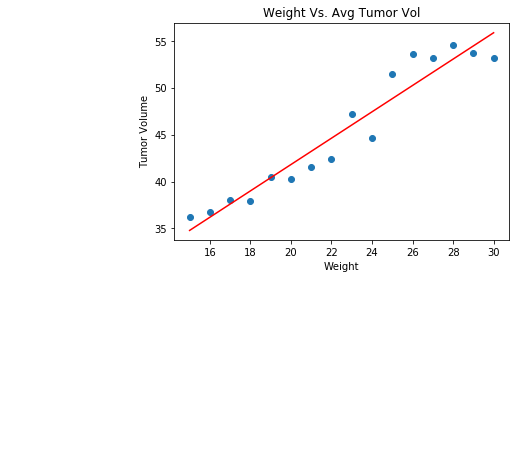

<Figure size 432x288 with 0 Axes>

In [41]:

# for mouse weight and average tumor volume for the Capomulin regimen
x_values=Capomulin_Reg["Weight (g)"]
y_values=Capomulin_Reg["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_values, y_values)
regress_values=x_values*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#Generate plot
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()
Save_Image=plt.savefig("images/correlation_plot.png")